# Cluster Analysis

A cluster is defined as a group of observations that are more similar to each other than they are to the observations in other groups.
> Cluster analysis is widely used in the biological and behavioral sciences, marketing, and medical research.

Examples:
* Psychological researcher might cluster data on the symptoms and demographics of depressed patients
* Marketing researchers use cluster analysis as a customer-segmentation strategy
* Medical researchers use cluster analysis to help catalog gene-expression patterns obtained from DNA microarray data

## Most popular clustering approaches
Hierarchical agglomerative clustering
> Each observation starts as its own cluster. Clusters are then combined, two at a time, until all clusters are merged into a single cluster.

Some Examples:
* Single linkage
* Complete linkage
* Average linkage
* Centroid
* Ward’s method

Partitioning clustering
> You specify K: the number of clusters sought. Observations are then randomly divided into K groups and reshuffled to form cohesive clusters

Some Examples:
* k-means
* Partitioning around medoids

# Examples Setup

Hierarchical clustering is applied to the nutrient dataset contained in the ```flexclust``` package to answer the following questions:
* What are the similarities and differences among 27 types of fish, fowl, and meat, based on 5 nutrient measures?
* Is there a smaller number of groups into which these foods can be meaningfully clustered?

Partitioning methods will be used to evaluate 13 chemical analyses of 178 Italian wine samples. The data are contained in the wine dataset available with the ```rattle``` package. Here, the questions are as follows:
* Are there subtypes of wine in the data?
* If so, how many subtypes are there, and what are their characteristics?

# Common steps in cluster analysis

1. **Choose appropriate attributes.** The first (and perhaps most important) step is to select variables that you feel may be important for identifying and understanding differences among groups of observations within the data.

For example, in a study of depression, you might want to assess one or more of the following:
* Psychological symptoms
* Physical symptoms
* Age at onset
* Number, duration and timing of episodes
* Number of hospitalization
* ...

A sophisticated cluster analysis can’t compensate for a poor choice of variables.

2. **Scale the data.** If the variables in the analysis vary in range, the variables with the largest range will have the greatest impact on the results. This is often undesirable, and analysts scale the data before continuing.

3. **Screen for outliers.** Many clustering techniques are sensitive to outliers, distorting the cluster solutions obtained. You can screen for (and remove) univariate outliers using functions from the ```outliers``` package. The ```mvoutlier``` package contains functions that can be used to identify multivariate outliers.

4. **Calculate distances.** Although clustering algorithms vary widely, they typically require a measure of the distance among the entities to be clustered. The most popular measure of the distance between two observations is the Euclidean distance, but the Manhattan, Canberra, asymmetric binary, maximum, and Minkowski distance measures are also available

5. **Select a clustering algorithm.** Next, you select a method of clustering the data. Hierarchical clustering is useful for smaller problems (say, 150 observations or less) and where a nested hierarchy of groupings is desired. The partitioning method can handle much larger problems but requires that the number of clusters be specified in advance.
> 6- **Obtain one or more cluster solutions.**

7. **Determine the number of clusters present.** In order to obtain a final cluster solution, you must decide how many clusters are present in the data. This is a thorny problem, and many approaches have been proposed. It usually involves extracting various numbers of clusters (say, 2 to K) and comparing the quality of the solutions. The ```NbClust()``` function provides 30 different indices to help you make this decision


8. **Obtain a final clustering solution.** Once the number of clusters has been determined, a final clustering is performed to extract that number of subgroups.

9. **Visualize the results.** Visualization can help you determine the meaning and usefulness of the cluster solution. The results of a hierarchical clustering are usually presented as a dendrogram. Partitioning results are typically visualized using a bivariate cluster plot.

10. **Interpret the clusters.** Once a cluster solution has been obtained, you must interpret (and possibly name) the clusters. What do the observations in a cluster have in common? How do they differ from the observations in other clusters?

11. **Validate the results.** Validating the cluster solution involves asking the question, “Are these groupings in some sense real, and not a manifestation of unique aspects of this dataset or statistical technique?” If a different cluster method or different sample is employed, would the same clusters be obtained?

# Calculating distances - Probably the most important

Every cluster analysis begins with the calculation of a distance, dissimilarity, or proximity between each entity to be clustered. The Euclidean distance between two observations is given by:

#### $ d_{ij}=\sqrt{\sum_{p=1}^{p}\left(x_{ip}-x_{jp}\right)^{2}}$

where $i$ and $j$ are observations and $P$ is the number of variables.

In [3]:
install.packages('flexclust')

package 'flexclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\RtmpAX4wJ2\downloaded_packages


In [4]:
data(nutrient, package="flexclust")

In [5]:
head(nutrient, 4)

,energy,protein,fat,calcium,iron
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6


The ```dist()``` function in the base R installation can be used to calculate the distances between all rows (observations) of a matrix or data frame. The format is ```dist(x,method=)```, where x is the input data and ```method="euclidean"``` by default

In [6]:
d <- dist(nutrient)
as.matrix(d)[1:4,1:4]

,BEEF BRAISED,HAMBURGER,BEEF ROAST,BEEF STEAK
BEEF BRAISED,0.00000,95.6400,80.93429,35.24202
HAMBURGER,95.64000,0.0000,176.49218,130.87784
BEEF ROAST,80.93429,176.4922,0.00000,45.76418
BEEF STEAK,35.24202,130.8778,45.76418,0.00000


> Euclidean distances are usually the distance measure of choice for continuous data. But if other variable types are present, alternative dissimilarity measures are required. You can use the daisy() function in the cluster package to obtain a dissimilarity matrix among observations that have any combination of binary, nominal, ordinal, and continuous attributes.

# Hierarchical cluster analysis
Remember: In agglomerative hierarchical clustering, each case or observation starts as its own cluster. Clusters are then combined two at a time until all clusters are
merged into a single cluster.

![](fig1.png)

* **Single-linkage clustering** tends to find elongated, cigar-shaped clusters. It also commonly displays a phenomenon called chaining—dissimilar observations are joined into the same cluster because they’re similar to intermediate observations between them.
* **Complete-linkage clustering** tends to find compact clusters of approximately equal diameter. It can also be sensitive to outliers.
* **Average-linkage clustering** offers a compromise between the two. It’s less likely to chain and is less susceptible to outliers. It also has a tendency to join clusters with small variances.
* **Ward’s method** tends to join clusters with small numbers of observations and tends to produce clusters with roughly equal numbers of observations. It can also be sensitive to outliers.
* **The centroid method** offers an attractive alternative due to its simple and easily understood definition of cluster distances. It’s also less sensitive to outliers than other hierarchical methods. But it may not perform as well as the averagelinkage or Ward method.

1. Define each observation (row, case) as a cluster.
2. Calculate the distances between every cluster and every other cluster.
3. Combine the two clusters that have the smallest distance. This reduces the number of clusters by one.
4. Repeat steps 2 and 3 until all clusters have been merged into a single cluster containing all observations.

Hierarchical clustering can be accomplished with the```hclust()``` function. The format is ```hclust(d, method=)```, where d is a distance matrix produced by the ```dist()``` function and methods include ```"single"```, ```"complete"```, ```"average"```, ```"centroid"```, and ```"ward"```.

1. First the data are imported, and the row names are set to lowercase 
2. Variables are standardizedto a mean of 0 and a standard deviation of 1.
3. Euclidean distances between each of the 27 food types are calculated, and an average-linkage clustering is performed.
4. Finally, the results are plotted as a dendrogram

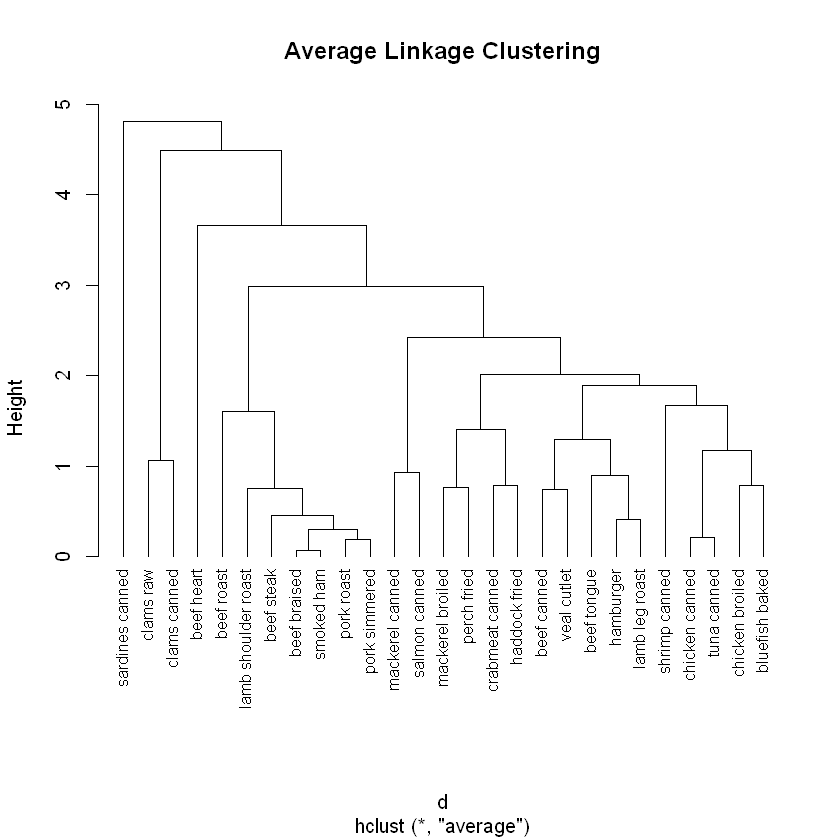

In [7]:
data(nutrient, package="flexclust")
row.names(nutrient) <- tolower(row.names(nutrient))
nutrient.scaled <- scale(nutrient)
d <- dist(nutrient.scaled)
fit.average <- hclust(d, method="average")
plot(fit.average, hang=-1, cex=.8, main="Average Linkage Clustering")

* The dendrogram displays how items are combined into clusters and is read from the bottom up. Each observation starts as its own cluster. Then the two observations that are closest (beef braised and smoked ham) are combined. Next, pork roast and pork simmered are combined, followed by chicken canned and tuna canned.
* The height dimension indicates the criterion value at which clusters are joined. For average-linkage clustering, this criterion is the average distance between each point in one cluster and each point in the other cluster.

The ```NbClust``` package offers numerous indices for determining the best number of clusters in a cluster analysis.

In [9]:
install.packages('NbClust')

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\RtmpAX4wJ2\downloaded_packages


Warning message in pf(beale, pp, df2):
"NaNs produced"Warning message in pf(beale, pp, df2):
"NaNs produced"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


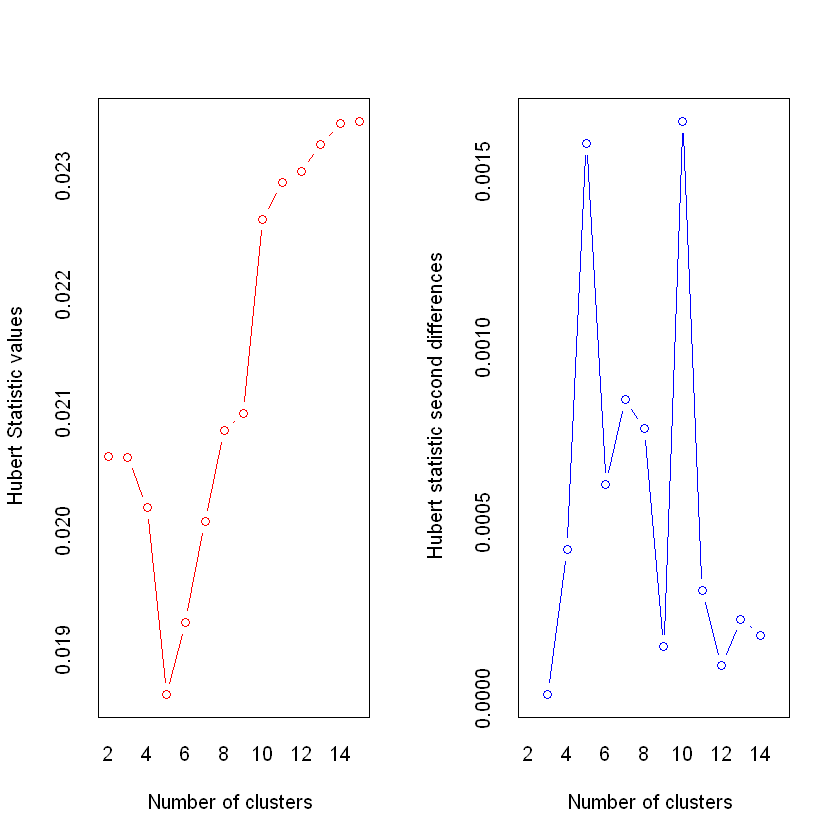

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 2 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number o


 0  1  2  3  4  5  9 10 13 14 15 
 2  1  4  4  2  4  1  1  2  1  4 

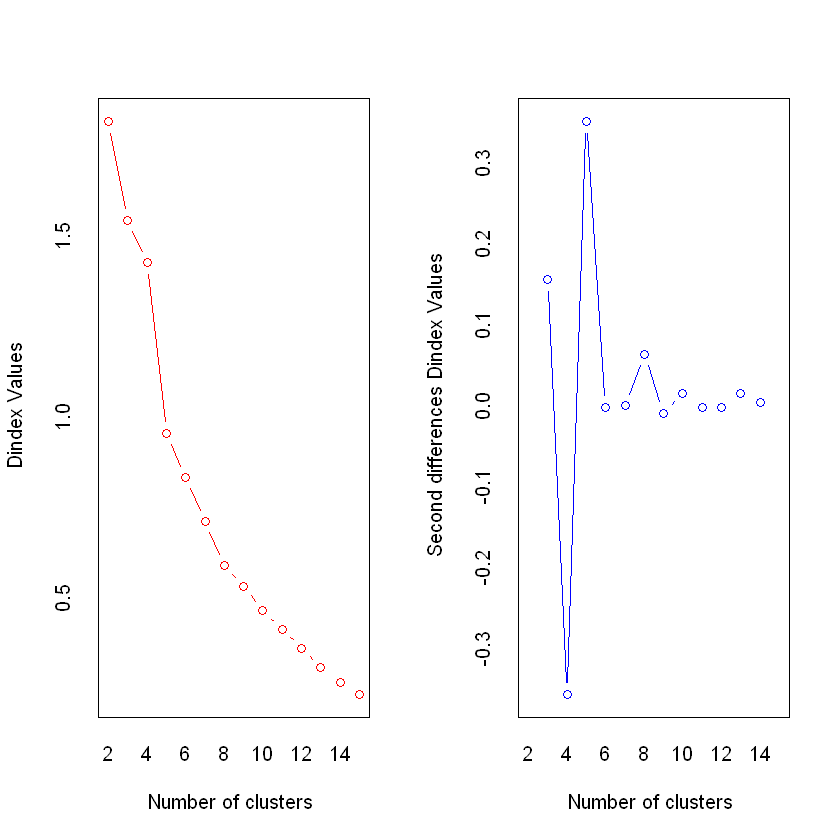

In [10]:
library(NbClust)
devAskNewPage(ask=TRUE)
nc <- NbClust(nutrient.scaled, distance="euclidean", min.nc=2, max.nc=15, method="average")
table(nc$Best.n[1,])

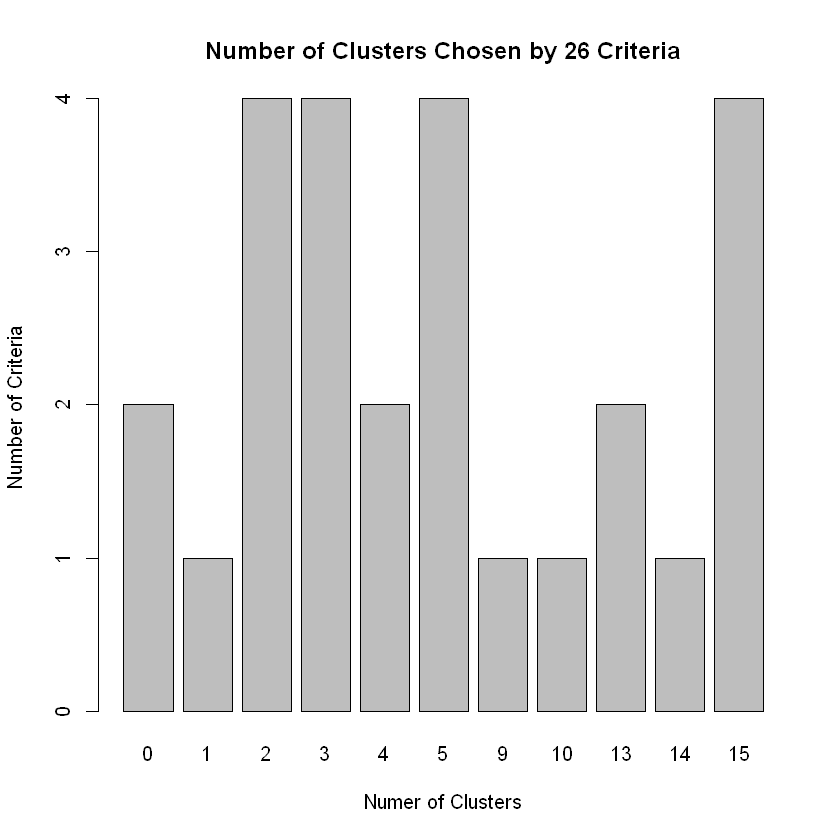

In [11]:
barplot(table(nc$Best.n[1,]),
xlab="Numer of Clusters", ylab="Number of Criteria",
main="Number of Clusters Chosen by 26 Criteria")

You could try the number of clusters (2, 3, 5, and 15) with the most “votes” and select the one that makes the most interpretive sense.

## Obtaining the final cluster solution

In [12]:
# Assigns Cases
clusters <- cutree(fit.average, k=5)
table(clusters)

clusters
 1  2  3  4  5 
 7 16  1  2  1 

In [13]:
# Describe Clusters
aggregate(nutrient, by=list(cluster=clusters), median)

cluster,energy,protein,fat,calcium,iron
1,340.0,19,29,9,2.50
2,170.0,20,8,13,1.45
3,160.0,26,5,14,5.90
4,57.5,9,1,78,5.70
5,180.0,22,9,367,2.50


In [14]:
aggregate(as.data.frame(nutrient.scaled), by=list(cluster=clusters), median)

cluster,energy,protein,fat,calcium,iron
1,1.3101024,0.0000000,1.3785620,-0.4480464,0.08110456
2,-0.3696099,0.2352002,-0.4869384,-0.3967868,-0.63743114
3,-0.4684165,1.6464016,-0.7534384,-0.3839719,2.40779157
4,-1.4811842,-2.3520023,-1.1087718,0.4361807,2.27092763
5,-0.2708033,0.7056007,-0.3981050,4.1396825,0.08110456


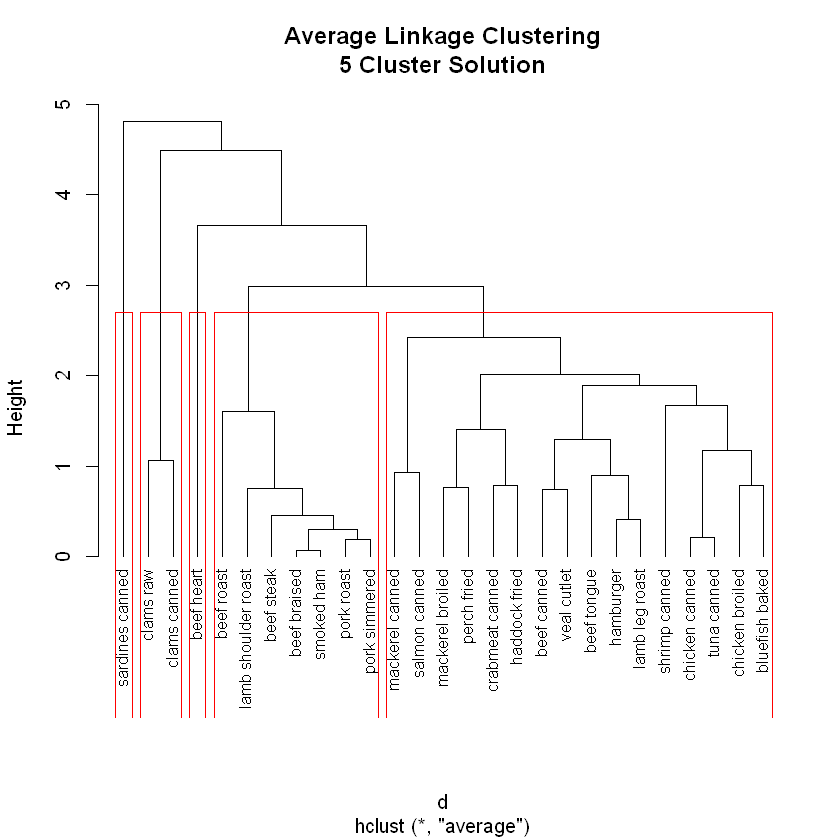

In [15]:
plot(fit.average, hang=-1, cex=.8, main="Average Linkage Clustering\n5 Cluster Solution")
rect.hclust(fit.average, k=5)

Sardines form their own cluster and are much higher in calcium than the other food groups. Beef heart is also a singleton and is high in protein and iron. The clam
cluster is low in protein and high in iron. The items in the cluster containing beef roast to pork simmered are high in energy and fat. Finally, the largest group (mackerel to bluefish) is relatively low in iron.

# Partitioning cluster analysis
Observations are divided into K groups and reshuffled to form the most cohesive clusters possible according to a given criterion.

## K-means clustering

1. Select K centroids (K rows chosen at random).
2. Assign each data point to its closest centroid.
3. Recalculate the centroids as the average of all data points in a cluster (that is, the centroids are p-length mean vectors, where p is the number of variables).
4. Assign data points to their closest centroids.
5. Continue steps 3 and 4 until the observations aren’t reassigned or the maximum number of iterations (R uses 10 as a default) is reached.

R uses an efficient algorithm by Hartigan and Wong (1979) that partitions the observations into k groups such that the sum of squares of the observations to their
assigned cluster centers is a minimum. This means, in steps 2 and 4, each observation is assigned to the cluster with the smallest value of

$ss(k) = \sum_{i=1}^{n}\sum_{j=0}^{p}\left(x_{ij}-\bar{x}_{kj}\right)^{2}$

where $k$ is the cluster, $x_{ij}$ is the value of the $j^{th}$ variable for the $i^{th}$ observation, $\bar{x}_{kj}$ is the mean of the $j^{th}$ variable for the $k^{th}$ cluster, and $p$ is the number of variables.

K-means clustering can handle larger datasets than hierarchical cluster approaches. Additionally, observations aren’t permanently committed to a cluster. They’re moved when doing so improves the overall solution. But the use of means implies that all variables must be continuous, and the approach can be severely affected by outliers.

Because k-means cluster analysis starts with k randomly chosen centroids, a different solution can be obtained each time the function is invoked. Use the ```set.seed()``` function to guarantee that the results are reproducible.

Let’s apply k-means clustering to a dataset containing 13 chemical measurements
on 178 Italian wine samples. The data originally come from the UCI Machine Learning
Repository (www.ics.uci.edu/~mlearn/MLRepository.html)

In [17]:
install.packages("rattle")

package 'rattle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\RtmpAX4wJ2\downloaded_packages


In [18]:
data(wine, package="rattle")
head(wine)

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [20]:
df <- scale(wine[-1]) # Scale the data

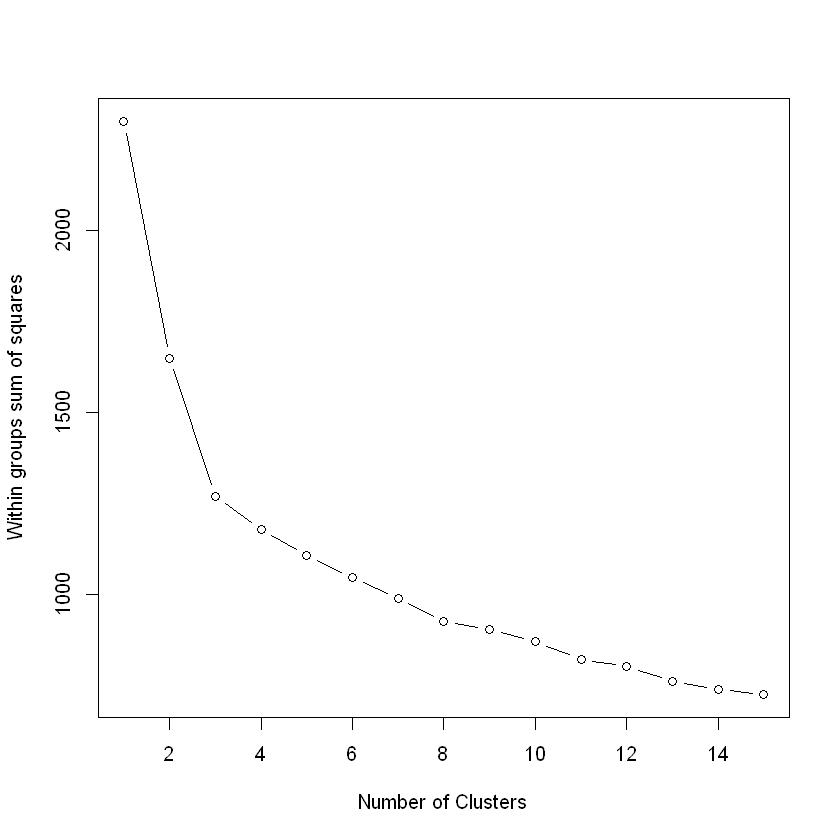

In [22]:
# Plot the results -
wssplot <- function(data, nc=15, seed=1234){
    wss <- (nrow(data)-1)*sum(apply(data,2,var))
    for (i in 2:nc){
        set.seed(seed)
        wss[i] <- sum(kmeans(data, centers=i)$withinss)}
    plot(1:nc, wss, type="b", xlab="Number of Clusters",
        ylab="Within groups sum of squares")}    
wssplot(df)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


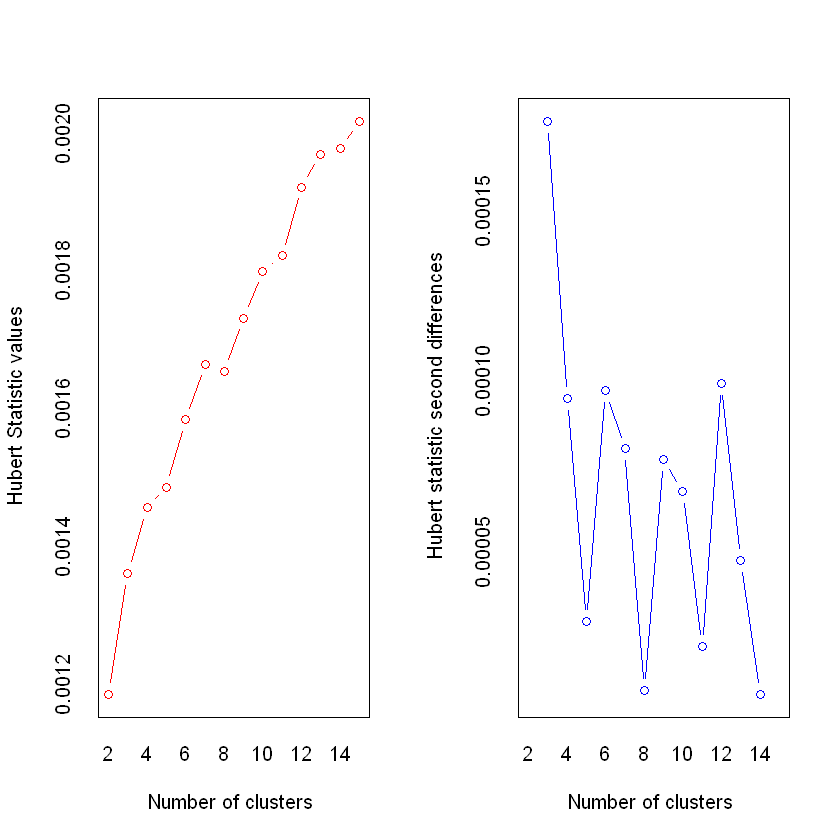

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 19 proposed 3 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 



 0  1  2  3 14 15 
 2  1  2 19  1  1 

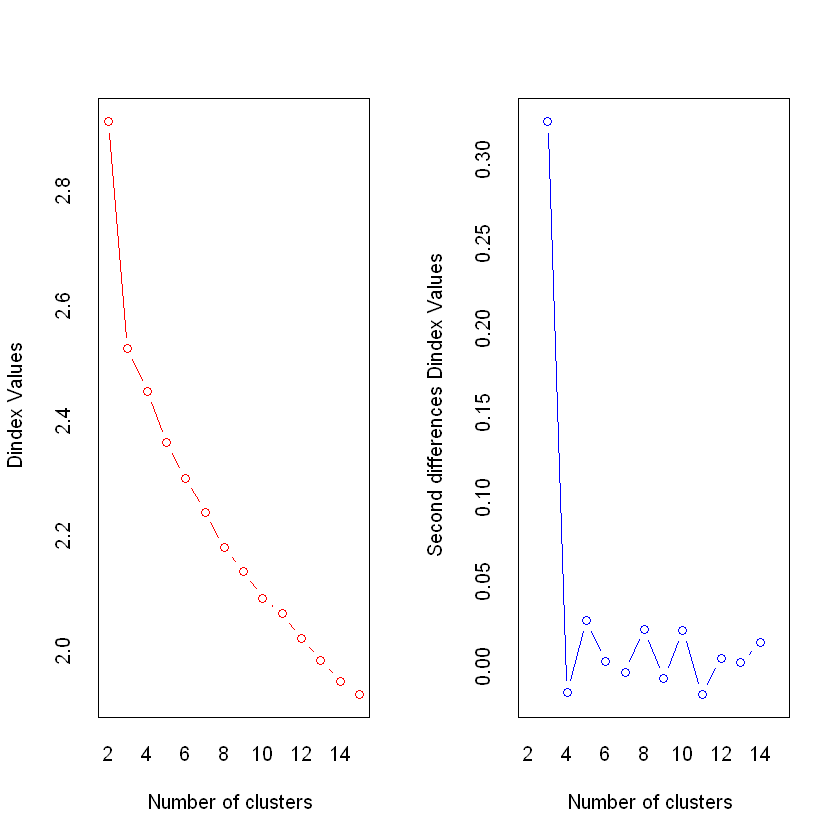

In [23]:
# Determine the number of clusters
library(NbClust)
set.seed(1234)
devAskNewPage(ask=TRUE)
nc <- NbClust(df, min.nc=2, max.nc=15, method="kmeans")
table(nc$Best.n[1,])


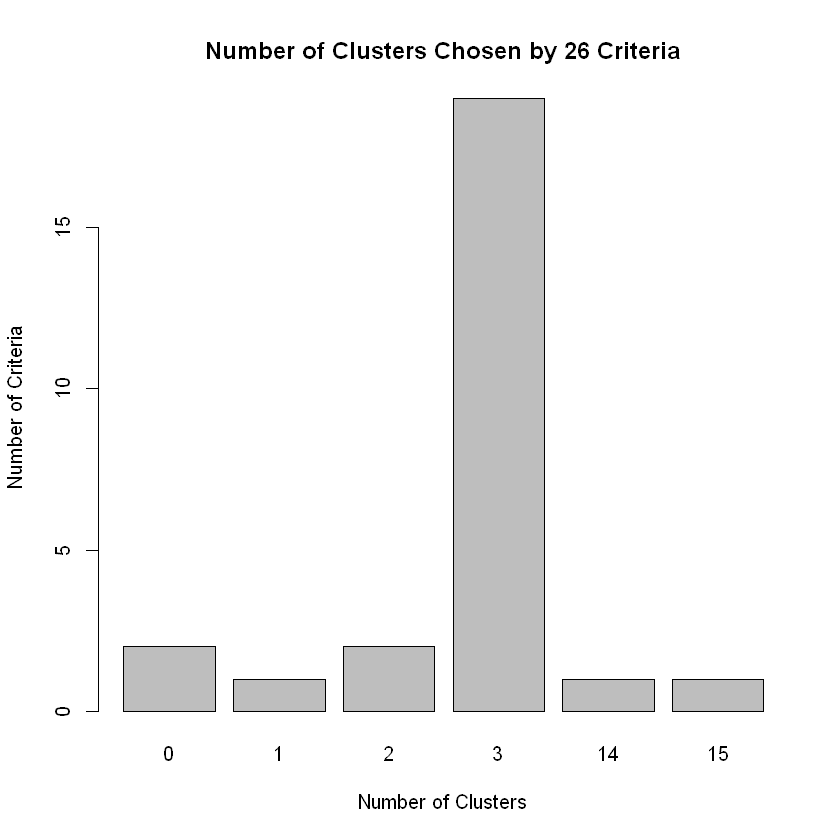

In [24]:
barplot(table(nc$Best.n[1,]),
xlab="Number of Clusters", ylab="Number of Criteria",
main="Number of Clusters Chosen by 26 Criteria")


In [25]:
set.seed(1234)

In [26]:
# Perform the k-means cluster analysis
fit.km <- kmeans(df, 3, nstart=25)
fit.km$size

[1] 62 65 51

In [27]:
fit.km$centers

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0.8328826,-0.3029551,0.3636801,-0.6084749,0.57596208,0.88274724,0.97506900,-0.56050853,0.57865427,0.1705823,0.4726504,0.7770551,1.1220202
-0.9234669,-0.3929331,-0.4931257,0.1701220,-0.49032869,-0.07576891,0.02075402,-0.03343924,0.05810161,-0.8993770,0.4605046,0.2700025,-0.7517257
0.1644436,0.8690954,0.1863726,0.5228924,-0.07526047,-0.97657548,-1.21182921,0.72402116,-0.77751312,0.9388902,-1.1615122,-1.2887761,-0.4059428


In [28]:
aggregate(wine[-1], by=list(cluster=fit.km$cluster), mean)

cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,13.67677,1.997903,2.466290,17.46290,107.96774,2.847581,3.0032258,0.2920968,1.922097,5.453548,1.0654839,3.163387,1100.2258
2,12.25092,1.897385,2.231231,20.06308,92.73846,2.247692,2.0500000,0.3576923,1.624154,2.973077,1.0627077,2.803385,510.1692
3,13.13412,3.307255,2.417647,21.24118,98.66667,1.683922,0.8188235,0.4519608,1.145882,7.234706,0.6919608,1.696667,619.0588


* Because the variables vary in range, they’re standardized prior to clustering. 
* The number of clusters is determined using the ```wssplot()``` and ```NbClust()``` functions.
* Figures indicates that there is a distinct drop in the within-groups sum of squares when moving from one to three clusters. After three clusters, this decreasedrops off, suggesting that a three-cluster solution may be a good fit to the data. 
* A final cluster solution is obtained with the ```kmeans()``` function, and the cluster centroids are printed. 
* Because the centroids provided by the function are based on standardized data, the ```aggregate()``` function is used along with the cluster memberships to determine variable means for each cluster in the original metric.

How well did k-means clustering uncover the actual structure of the data contained in the Type variable? A cross-tabulation of Type (wine varietal) and cluster membership is given by:

In [29]:
ct.km <- table(wine$Type, fit.km$cluster)
ct.km

   
     1  2  3
  1 59  0  0
  2  3 65  3
  3  0  0 48

In [30]:
library(flexclust)
randIndex(ct.km)

Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


ARI 
0.897495

# Partitioning around medoids
Because it’s based on means, the k-means clustering approach can be sensitive to outliers.
A more robust solution is provided by partitioning around medoids (PAM).
Rather than representing each cluster using a centroid (a vector of variable means),
each cluster is identified by its most representative observation (called a medoid).

1. Randomly select K observations (call each a medoid).
2. Calculate the distance/dissimilarity of every observation to each medoid.
3. Assign each observation to its closest medoid.
4. Calculate the sum of the distances of each observation from its medoid (total cost).
5. Select a point that isn’t a medoid, and swap it with its medoid.
6. Reassign every point to its closest medoid.
7. Calculate the total cost.
8. If this total cost is smaller, keep the new point as a medoid.
9. Repeat steps 5–8 until the medoids don’t change.

In [31]:
library(cluster)
set.seed(1234)
fit.pam <- pam(wine[-1], k=3, stand=TRUE)
fit.pam$medoids

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.1,1.04,3.47,920
12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.00,3.17,510
13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750


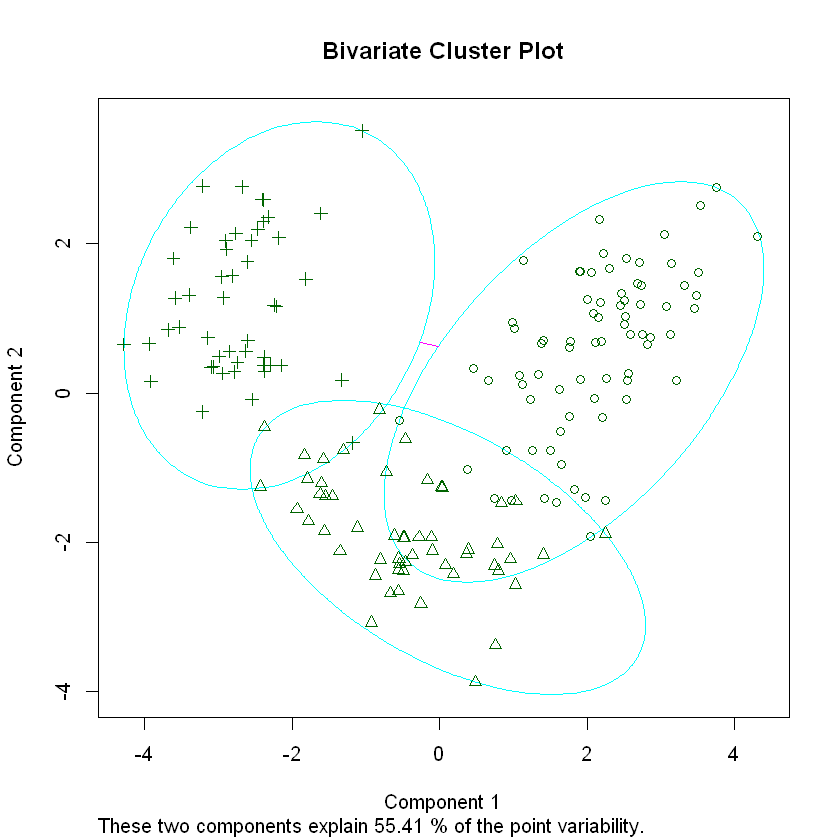

In [32]:
clusplot(fit.pam, main="Bivariate Cluster Plot")

# Avoiding nonexistent clusters

Cluster analysis is a methodology
designed to identify cohesive subgroups in a dataset. It’s very good at doing
this. In fact, it’s so good, it can find clusters where none exist.

In [35]:
install.packages("fMultivar")

also installing the dependencies 'gss', 'stabledist', 'timeSeries', 'fBasics', 'cubature', 'sn'



package 'gss' successfully unpacked and MD5 sums checked
package 'stabledist' successfully unpacked and MD5 sums checked
package 'timeSeries' successfully unpacked and MD5 sums checked
package 'fBasics' successfully unpacked and MD5 sums checked
package 'cubature' successfully unpacked and MD5 sums checked
package 'sn' successfully unpacked and MD5 sums checked
package 'fMultivar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\RtmpAX4wJ2\downloaded_packages


Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics

Attaching package: 'fBasics'

The following object is masked from 'package:flexclust':

    getModel

The following object is masked from 'package:modeltools':

    getModel



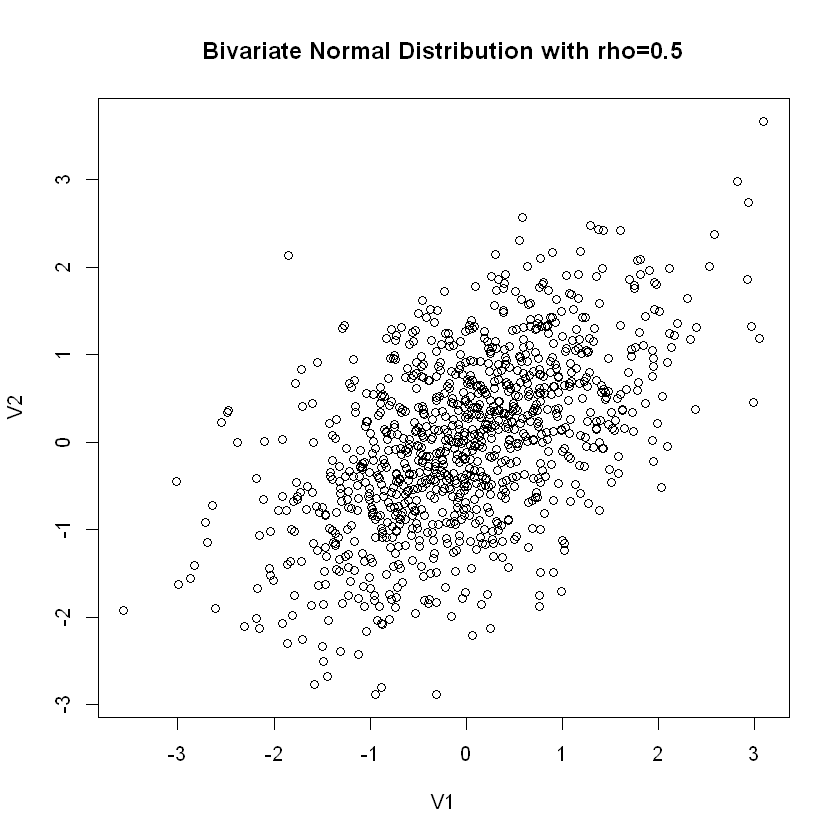

In [36]:
library(fMultivar)
set.seed(1234)
df <- rnorm2d(1000, rho=.5)
df <- as.data.frame(df)
plot(df, main="Bivariate Normal Distribution with rho=0.5")

The rnorm2d() function in the fMultivar package is used to sample 1,000 observations
from a bivariate normal distribution with a correlation of 0.5.

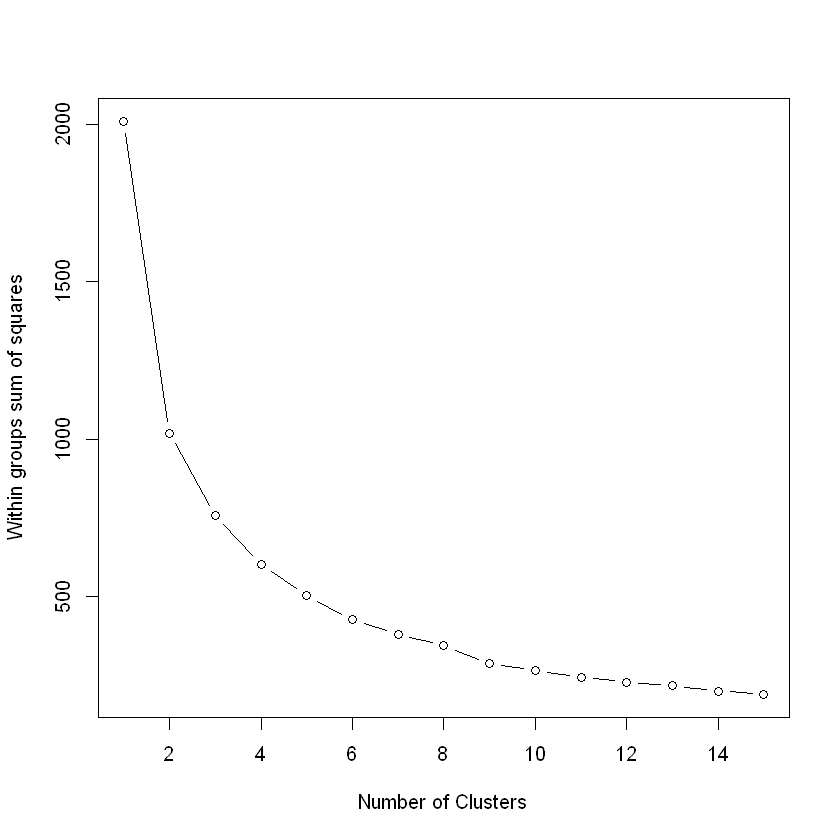

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


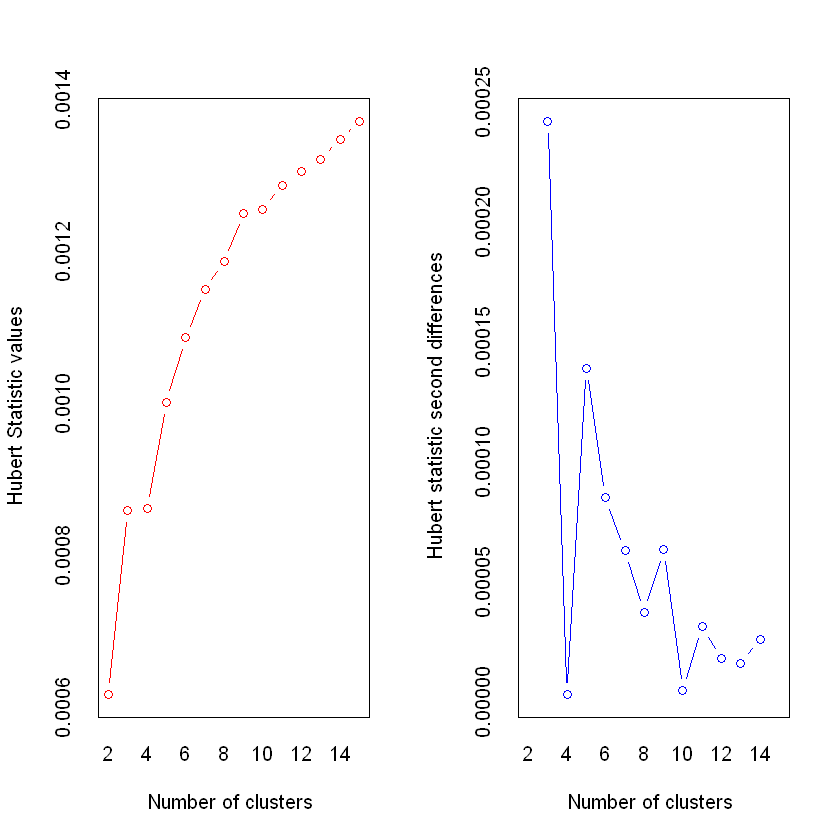

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
**************************

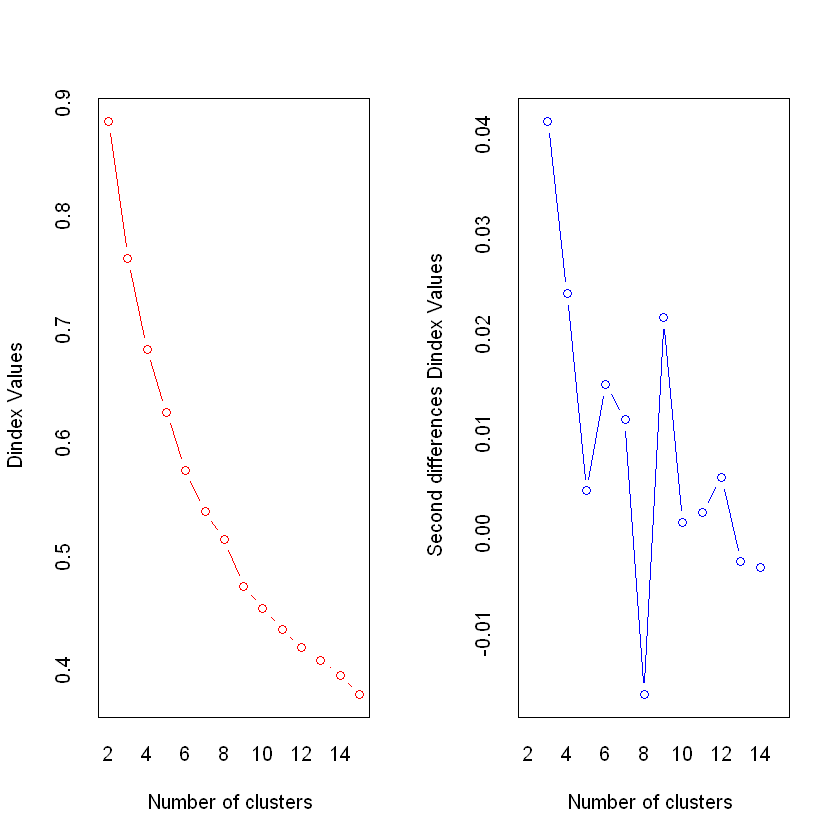

In [37]:
wssplot(df)
library(NbClust)
nc <- NbClust(df, min.nc=2, max.nc=15, method="kmeans")
dev.new()
barplot(table(nc$Best.n[1,]),
xlab="Number of Clusters", ylab="Number of Criteria",
main="Number of Clusters Chosen by 26 Criteria")

The ```wssplot()``` function suggest that there are three clusters, whereas many of the criteria
returned by ```NbClust()``` suggest between two and three clusters. If you carry out a
two-cluster analysis with PAM

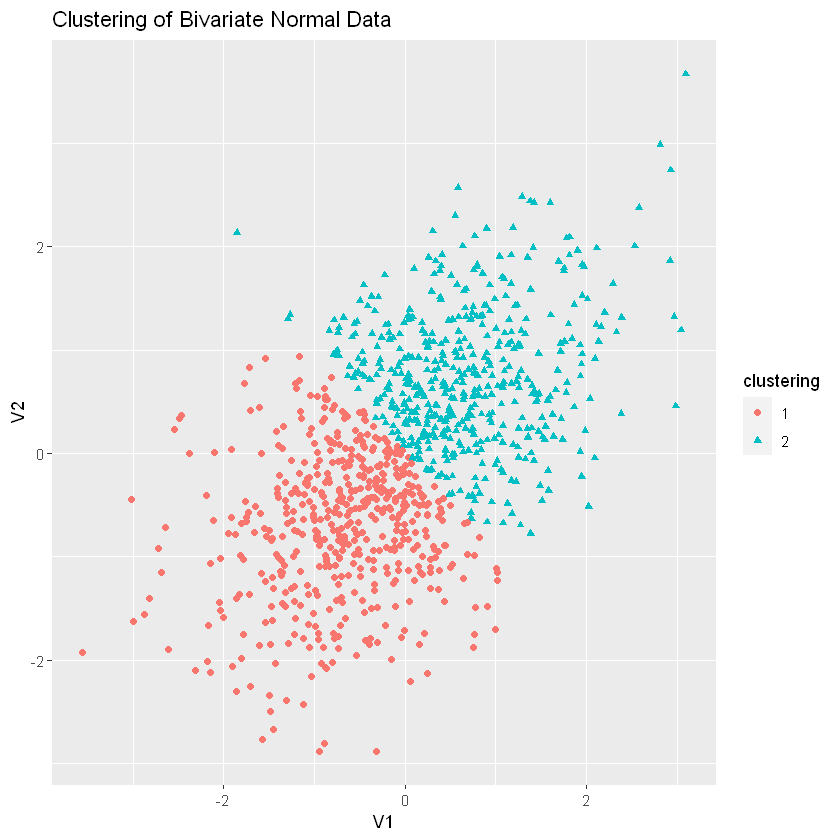

In [40]:
library(ggplot2)
library(cluster)
fit <- pam(df, k=2)
df$clustering <- factor(fit$clustering)
ggplot(data=df, aes(x=V1, y=V2, color=clustering, shape=clustering)) +
geom_point() + ggtitle("Clustering of Bivariate Normal Data")

Clearly the partitioning is artificial. There are no real clusters here. How can you
avoid this mistake? Although it isn’t foolproof, I have found that the Cubic Cluster
Criteria (CCC) reported by NbClust can often help to uncover situations where no
structure exists.

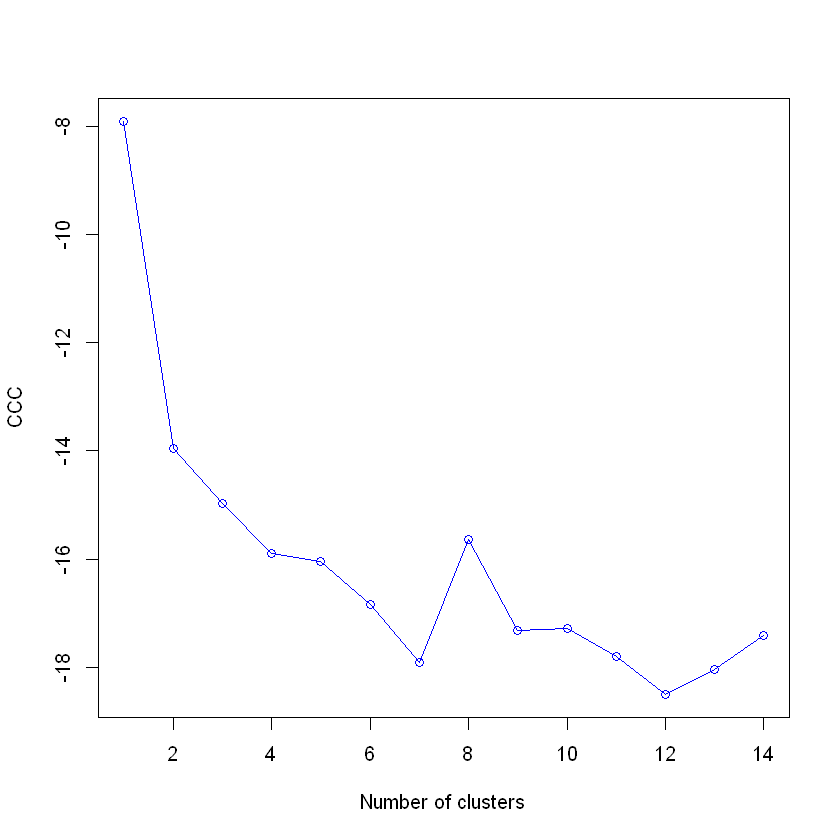

In [39]:
plot(nc$All.index[,4], type="o", ylab="CCC", xlab="Number of clusters", col="blue")

When the CCC values are all negative and decreasing for two or more clusters, the distribution is typically unimodal.